#### Group 12
Colin Brence <br> 
Greg Martin Teo <br> 
Marcus Crewe <hr> 

### Part B: Data Analysis Module:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn
%matplotlib inline
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
data = pd.read_csv(r'Capital_Project_Detail_Data_-_Dollars.csv', low_memory = False, thousands=',') ##make sure the csv file is on the same folder as the Final project JNB.

print('There are', len(data), 'variables and', len(data.columns), 'columns within this data set.')

There are 25988 variables and 30 columns within this data set.


In [3]:
print(data.columns)

Index(['PUB_DATE', 'BORO', 'MANAGING_AGCY_CD', 'MANAGING_AGCY', 'PROJECT_ID',
       'PROJECT_DESCR', 'TYP_CATEGORY_NAME', 'COMMUNITY_BOARD', 'BUDGET_LINE',
       'DELAY_DESC', 'SITE_DESCR', 'SCOPE_TEXT', 'FY_YR1_PLAN', 'ORIG_BUD_AMT',
       'CITY_PRIOR_ACTUAL', 'CITY_YR1_PLAN', 'CITY_YR2_PLAN', 'CITY_YR3_PLAN',
       'CITY_YR4_PLAN', 'CITY_YR5_PLAN', 'CITY_RTC', 'CITY_PLAN_TOTAL',
       'NONCITY_PRIOR_ACTUAL', 'NONCITY_YR1_PLAN', 'NONCITY_YR2_PLAN',
       'NONCITY_YR3_PLAN', 'NONCITY_YR4_PLAN', 'NONCITY_YR5_PLAN',
       'NONCITY_RTC', 'NONCITY_PLAN_TOTAL'],
      dtype='object')


In [4]:
data.head()

PUB_DATE      BORO  MANAGING_AGCY_CD              MANAGING_AGCY PROJECT_ID  \
0  20190425  CITYWIDE                35  NEW YORK RESEARCH LIBRARY   L103RENO   
1  20190425  CITYWIDE                37    NEW YORK PUBLIC LIBRARY  LN18SYSWI   
2  20190425  CITYWIDE                37    NEW YORK PUBLIC LIBRARY  LN19CAREN   
3  20190425  CITYWIDE                37    NEW YORK PUBLIC LIBRARY  LNCOUNCIL   
4  20190425  CITYWIDE                37    NEW YORK PUBLIC LIBRARY  LNSYSBFFE   

                      PROJECT_DESCR                       TYP_CATEGORY_NAME  \
0  RESEARCH LIBRARIES - Renovations  ESSENTIAL RECONSTRUCTION OF FACILITIES   
1    SYSTEMWIDE LUMP-SUM ALLOCATION  ESSENTIAL RECONSTRUCTION OF FACILITIES   
2      Carnegie Renovation Overruns  ESSENTIAL RECONSTRUCTION OF FACILITIES   
3   NYC Council funding by District  ESSENTIAL RECONSTRUCTION OF FACILITIES   
4             Systemwide FF&E Needs  ESSENTIAL RECONSTRUCTION OF FACILITIES   

  COMMUNITY_BOARD                BUDGET_LINE  \
0             NaN                     L-0101   
1               0          LN-0008  LN-0101M   
2             NaN                    LN-0008   
3             NaN  LN-D008  LN-D002  LN-D003   
4             NaN                    LN-0008   

                                     DELAY_DESC  ... CITY_RTC CITY_PLAN_TOTAL  \
0  PROJECT DELAYED DUE TO BUDGETARY CONSTRAINTS  ...     1908          2508.0   
1                                           NaN  ...    14657         25239.0   
2                                           NaN  ...        0          3745.0   
3                                           NaN  ...        0          6488.0   
4                                           NaN  ...      572           730.0   

   NONCITY_PRIOR_ACTUAL  NONCITY_YR1_PLAN  NONCITY_YR2_PLAN  NONCITY_YR3_PLAN  \
0                   0.0                 0                 0                 0   
1                   0.0                 0                 0                 0   
2                   0.0                 0                 0                 0   
3                   0.0                 0                 0                 0   
4                   0.0                 0                 0                 0   

   NONCITY_YR4_PLAN  NONCITY_YR5_PLAN  NONCITY_RTC  NONCITY_PLAN_TOTAL  
0                 0                 0            0                 0.0  
1                 0                 0            0                 0.0  
2                 0                 0            0                 0.0  
3                 0                 0            0                 0.0  
4                 0                 0            0                 0.0  

[5 rows x 30 columns]

In [5]:
loc_data = pd.DataFrame(data, columns = ['FY_YR1_PLAN','BORO', 'MANAGING_AGCY','TYP_CATEGORY_NAME', 'CITY_PLAN_TOTAL', 'NONCITY_PLAN_TOTAL', 'PROJECT_ID'])
loc_data.head()

FY_YR1_PLAN      BORO              MANAGING_AGCY  \
0         2019  CITYWIDE  NEW YORK RESEARCH LIBRARY   
1         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY   
2         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY   
3         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY   
4         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY   

                        TYP_CATEGORY_NAME  CITY_PLAN_TOTAL  \
0  ESSENTIAL RECONSTRUCTION OF FACILITIES           2508.0   
1  ESSENTIAL RECONSTRUCTION OF FACILITIES          25239.0   
2  ESSENTIAL RECONSTRUCTION OF FACILITIES           3745.0   
3  ESSENTIAL RECONSTRUCTION OF FACILITIES           6488.0   
4  ESSENTIAL RECONSTRUCTION OF FACILITIES            730.0   

   NONCITY_PLAN_TOTAL PROJECT_ID  
0                 0.0   L103RENO  
1                 0.0  LN18SYSWI  
2                 0.0  LN19CAREN  
3                 0.0  LNCOUNCIL  
4                 0.0  LNSYSBFFE

In [6]:
type(loc_data['CITY_PLAN_TOTAL'])

pandas.core.series.Series

In [7]:
loc_data_year = loc_data['FY_YR1_PLAN'].value_counts(sort=True) ## Sorted True to see which year had the highest dollar amount of projects. Interestingly, There are 3 times the amount of projects for 2020 compared to 2019.
print(loc_data_year)

## instead of loc_data_year.head() it should be print(loc_data_year)

2020    15569
2019     5219
2021     5200
Name: FY_YR1_PLAN, dtype: int64


In [8]:
loc_data_boro = loc_data['BORO'].value_counts(sort=True) ## Sorted True to see which Borough had the highest dollar amount of projects.
print(loc_data_boro)

MANHATTAN    6163
BROOKLYN     5599
QUEENS       5196
BRONX        3739
CITYWIDE     3312
RICHMOND     1979
Name: BORO, dtype: int64


In [9]:
loc_data_agcy = loc_data['MANAGING_AGCY'].value_counts(sort=True) ## Sorted True to see which Department had the highest dollar amount of projects.
print(loc_data_agcy)

DEPT OF PARKS AND RECREATION               6686
DEPT OF DESIGN & CONSTRUCTION              4955
DEPARTMENT OF TRANSPORTATION               2182
DEPT OF  SMALL BUSINESS SERVICES           2060
DEPT ENVIRONMENTAL PROTECTION              1827
HOUSING PRESERVATION AND DEVEL             1455
DEPT OF CITYWIDE ADMIN SERVS               1421
CITY UNIVERSITY                            1262
HEALTH AND HOSPITALS CORP                   804
FIRE DEPARTMENT                             493
POLICE DEPARTMENT                           430
DEPARTMENT OF CORRECTION                    421
DEPT OF HOMELESS SERVICES                   416
DEPARTMENT OF SANITATION                    399
DEPARTMENT OF CULTURAL AFFAIRS              346
QUEENS BOROUGH PUBLIC LIBRARY               220
NEW YORK PUBLIC LIBRARY                     176
DEPARTMENT OF HEALTH AND MENTAL HYGIENE     128
BROOKLYN PUBLIC LIBRARY                     108
HUMAN RESOURCES ADMINISTRATION               72
ADMIN FOR CHILDREN'S SERVICES           

In [33]:
loc_data_agcy = loc_data['MANAGING_AGCY'].value_counts(sort=True, normalize=True) ## A quarter of total spending came from DEPT of Parks and Recreation
print('FREQUENCY DISTRIBUTION:', round((loc_data_agcy *100),2), sep='\n')

FREQUENCY DISTRIBUTION:
DEPT OF PARKS AND RECREATION              25.73
DEPT OF DESIGN & CONSTRUCTION             19.07
DEPARTMENT OF TRANSPORTATION                8.4
DEPT OF  SMALL BUSINESS SERVICES           7.93
DEPT ENVIRONMENTAL PROTECTION              7.03
HOUSING PRESERVATION AND DEVEL              5.6
DEPT OF CITYWIDE ADMIN SERVS               5.47
CITY UNIVERSITY                            4.86
HEALTH AND HOSPITALS CORP                  3.09
FIRE DEPARTMENT                             1.9
POLICE DEPARTMENT                          1.65
DEPARTMENT OF CORRECTION                   1.62
DEPT OF HOMELESS SERVICES                   1.6
DEPARTMENT OF SANITATION                   1.54
DEPARTMENT OF CULTURAL AFFAIRS             1.33
QUEENS BOROUGH PUBLIC LIBRARY              0.85
NEW YORK PUBLIC LIBRARY                    0.68
DEPARTMENT OF HEALTH AND MENTAL HYGIENE    0.49
BROOKLYN PUBLIC LIBRARY                    0.42
HUMAN RESOURCES ADMINISTRATION             0.28
ADMIN FOR CHILDR

In [11]:
project_type = loc_data['TYP_CATEGORY_NAME'].value_counts(sort=True) ## Highest dollar amount by project type is Neighborhood Parks and Playgrounds
print(project_type)

NEIGHBORHOOD PARKS AND PLAYGROUNDS                  3828
LARGE, MAJOR AND REGIONAL PARK RECONSTRUCTION       1497
ESSENTIAL RECONSTRUCTION OF FACILITIES              1455
PRIMARY STREET RECONSTRUCTION                       1346
LOW TO MODERATE INCOME PUBLIC HOUSING UPGRADE       1333
                                                    ... 
MISCELLANEOUS PROJECTS FOR NEW YORK CITY TRANSIT       1
EMERGENCY, INSPECTION AND MISCELLANEOUS                1
IFA TRACKWORK PROJECT FOR NEW YORK CITY TRANSIT        1
MISCELLANEOUS PROGRAMS                                 1
RECONSTRUCTION OF SECURE DETENTION FACILITIES          1
Name: TYP_CATEGORY_NAME, Length: 145, dtype: int64


In [12]:
loc_data_projectid= loc_data['PROJECT_ID'].value_counts(sort=True) ## SANDCONDT - hurrican sandy electrical conduit repair/replacement
print(loc_data_projectid)

SANDCONDT    10
P-213CNTR     9
SAND2605      9
HBBA24181     7
GCJA03-3A     6
             ..
P-200PPNM     1
HAM21SPMO     1
LTCP2015      1
HWK300-01     1
JFK-INTER     1
Name: PROJECT_ID, Length: 6494, dtype: int64


Text(0.5, 1.0, 'Number of Projects')

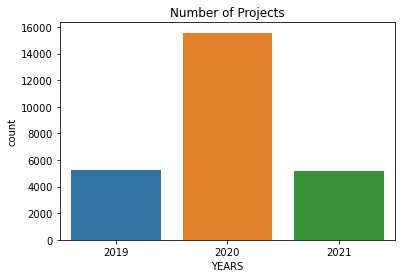

In [34]:
seaborn.countplot(x='FY_YR1_PLAN', data=loc_data)
plt.xlabel("YEARS")
plt.title("Number of Projects")

Text(0.5, 1.0, 'Number of Projects')

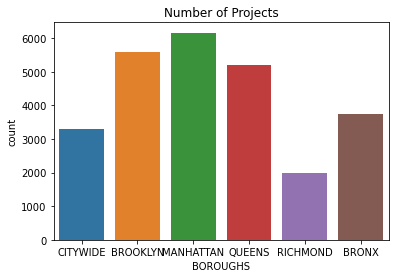

In [14]:
seaborn.countplot(x='BORO', data=loc_data)
plt.xlabel("BOROUGHS")
plt.title("Number of Projects")

Text(0.5, 1.0, 'Number of Projects')

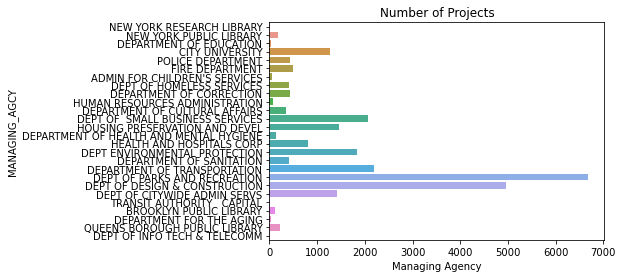

In [15]:
seaborn.countplot(y='MANAGING_AGCY', data=loc_data) ## switched it to Y since labels are unreadable when placed in X-axis.
plt.xlabel("Managing Agency")
plt.title("Number of Projects")

In [16]:
loc_data[['CITY_PLAN_TOTAL','NONCITY_PLAN_TOTAL']] = loc_data[['CITY_PLAN_TOTAL','NONCITY_PLAN_TOTAL']].astype(int) ## needed to convert columns to integers to avoid concatenating strings when using sum()
loc_data.groupby(['FY_YR1_PLAN','BORO','MANAGING_AGCY',]).sum(numeric_only=True) ## I stopped separation up to agency, but adding 'TYP_CATEGORY_NAME' will further show the break-down per category of project.

CITY_PLAN_TOTAL  \
FY_YR1_PLAN BORO     MANAGING_AGCY                                     
2019        BRONX    ADMIN FOR CHILDREN'S SERVICES            180088   
                     CITY UNIVERSITY                           78121   
                     DEPARTMENT FOR THE AGING                    600   
                     DEPARTMENT OF CORRECTION                 639394   
                     DEPARTMENT OF CULTURAL AFFAIRS            24025   
...                                                              ...   
2021        RICHMOND FIRE DEPARTMENT                           16697   
                     HEALTH AND HOSPITALS CORP                  7914   
                     HOUSING PRESERVATION AND DEVEL             9141   
                     NEW YORK PUBLIC LIBRARY                    7601   
                     POLICE DEPARTMENT                          2499   

                                                     NONCITY_PLAN_TOTAL  
FY_YR1_PLAN BORO     MANAGING_AGCY                                       
2019        BRONX    ADMIN FOR CHILDREN'S SERVICES                    0  
                     CITY UNIVERSITY                                 92  
                     DEPARTMENT FOR THE AGING                         0  
                     DEPARTMENT OF CORRECTION                     80074  
                     DEPARTMENT OF CULTURAL AFFAIRS                   0  
...                                                                 ...  
2021        RICHMOND FIRE DEPARTMENT                                  0  
                     HEALTH AND HOSPITALS CORP                        0  
                     HOUSING PRESERVATION AND DEVEL                   0  
                     NEW YORK PUBLIC LIBRARY                          0  
                     POLICE DEPARTMENT                                0  

[350 rows x 2 columns]

In [17]:
#Evaluating funding over time of projects by comparing different years as percentage of total spending
spend_data= pd.DataFrame(data, columns = ['FY_YR1_PLAN','BORO','MANAGING_AGCY','PROJECT_ID','CITY_PRIOR_ACTUAL','CITY_YR1_PLAN','CITY_YR2_PLAN','CITY_YR3_PLAN','CITY_YR4_PLAN','CITY_YR5_PLAN'])
spend_data.head()

FY_YR1_PLAN      BORO              MANAGING_AGCY PROJECT_ID  \
0         2019  CITYWIDE  NEW YORK RESEARCH LIBRARY   L103RENO   
1         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY  LN18SYSWI   
2         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY  LN19CAREN   
3         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY  LNCOUNCIL   
4         2019  CITYWIDE    NEW YORK PUBLIC LIBRARY  LNSYSBFFE   

   CITY_PRIOR_ACTUAL  CITY_YR1_PLAN  CITY_YR2_PLAN  CITY_YR3_PLAN  \
0                0.0              0              0             45   
1                0.0              0           6710              0   
2                0.0              0              0              0   
3                0.0              0              0              0   
4                0.0              0              0              0   

   CITY_YR4_PLAN  CITY_YR5_PLAN  
0            221            334  
1            758           3114  
2           3745              0  
3              0           6488  
4              0            158

In [18]:
#Finding 5 largest projects overall by spending amount
spend_data.nlargest(5, 'CITY_PRIOR_ACTUAL')

FY_YR1_PLAN      BORO                  MANAGING_AGCY PROJECT_ID  \
12            2019  CITYWIDE        DEPARTMENT OF EDUCATION      SCA18   
25575         2021     BRONX  DEPT ENVIRONMENTAL PROTECTION    HED-545   
15142         2020     BRONX  DEPT ENVIRONMENTAL PROTECTION    HED-545   
20381         2020     BRONX  DEPT ENVIRONMENTAL PROTECTION    HED-545   
9929          2020     BRONX  DEPT ENVIRONMENTAL PROTECTION    HED-545   

       CITY_PRIOR_ACTUAL  CITY_YR1_PLAN  CITY_YR2_PLAN  CITY_YR3_PLAN  \
12            2953770.00           1112              0              0   
25575         2826738.00           5522              0              0   
15142         2821204.00          10785              0              0   
20381         2821204.00          10666            359              0   
9929          2821203.82           5416              0              0   

       CITY_YR4_PLAN  CITY_YR5_PLAN  
12                 0              0  
25575              0              0  
15142              0              0  
20381              0              0  
9929               0              0

In [19]:
#Finding 5 largest projects in each group by spending amount
largest_proj= spend_data.groupby(['BORO','MANAGING_AGCY'])['CITY_PRIOR_ACTUAL'].nlargest(5)
largest_proj.head()

BORO   MANAGING_AGCY                      
BRONX  ADMIN FOR CHILDREN'S SERVICES  4552    0.0
                                      4553    0.0
                                      4554    0.0
                                      9680    0.0
                                      9681    0.0
Name: CITY_PRIOR_ACTUAL, dtype: float64

In [20]:
#Above data Frame is quite large, so we will print to a .csv file
largest_proj.to_csv(r'largest_projs.csv')

In [21]:
#Formatting so that float values display accurately
pd.options.display.float_format = '{:,}'.format

In [22]:
spend_year= spend_data[['CITY_PRIOR_ACTUAL','CITY_YR1_PLAN','CITY_YR2_PLAN','CITY_YR3_PLAN','CITY_YR4_PLAN','CITY_YR5_PLAN']]

In [23]:
#Removing negative numbers from year-by-year spending data in order generate an area plot
spend_year = spend_year.drop(spend_year[spend_year['CITY_YR1_PLAN'] < 0].index)
spend_year = spend_year.drop(spend_year[spend_year['CITY_YR2_PLAN'] < 0].index)
spend_year = spend_year.drop(spend_year[spend_year['CITY_YR3_PLAN'] < 0].index)
spend_year = spend_year.drop(spend_year[spend_year['CITY_YR4_PLAN'] < 0].index)
spend_year = spend_year.drop(spend_year[spend_year['CITY_YR5_PLAN'] < 0].index)

In [24]:
#Taking sum of spending in all years
sum_all_years= spend_year.sum(numeric_only=True)

#Formatting so that float values display accurately, with commas
pd.options.display.float_format = '{:,}'.format

spend_data['sum_all_years']= sum_all_years

print(sum_all_years)

CITY_PRIOR_ACTUAL   172,945,307.81
CITY_YR1_PLAN         46,177,502.0
CITY_YR2_PLAN         48,498,194.0
CITY_YR3_PLAN         47,796,170.0
CITY_YR4_PLAN         52,926,268.0
CITY_YR5_PLAN         49,589,167.0
dtype: float64


Text(0, 0.5, 'Total Cost, budgeted per year, in millions')

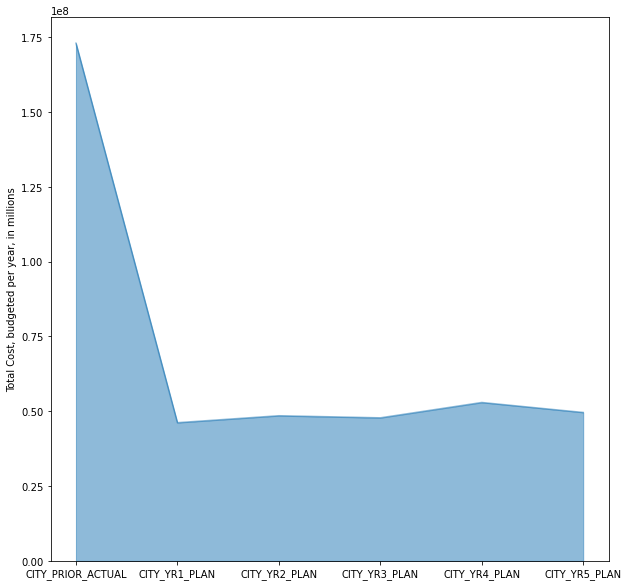

In [25]:
#Creating area plot to show change in budgeted amount for projects year-by-year
ax=sum_all_years.plot.area(stacked=False, figsize= (10,10))
ax.set_ylabel("Total Cost, budgeted per year, in millions")

#We can see that the amounts funded for five fiscal years actually exceed the Year-to-Date funded amounts as indicated
#in City Year Prior